# Aggregation and Grouping

In [2]:
# We can do efficient summarization, such as computing aggregations (sum(), mean(), median() etc)
# in which a single number gives insight into the nature of a large dataset.

In [3]:
 # Planets Data

 '''Let’s use the Planets dataset, which is available on Seaborn Package. It gives information on
 planets that astronomers have discovered around other stars. '''

'Let’s use the Planets dataset, which is available on Seaborn Package. It gives information on\nplanets that astronomers have discovered around other stars. '

In [4]:
import seaborn as sb
planets = sb.load_dataset('planets')
planets.shape

(1035, 6)

In [5]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [6]:
# Simple Aggregation in Pandas

 # Just like in NumPy arrays, in Pandas Series the aggregates return a single value.

In [7]:
import numpy as np
import pandas as pd
rng = np.random.RandomState(42)

 # Series
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [8]:
ser.sum()

np.float64(2.811925491708157)

In [9]:
ser.mean()

np.float64(0.5623850983416314)

In [10]:
# DataFrame
df = pd.DataFrame({'A': rng.rand(5),
                    'B': rng.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [11]:
df.mean() # returns means by columns by default
 

A    0.477888
B    0.443420
dtype: float64

In [12]:
# mean by rows
df.mean(axis=1)

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

In [13]:
#alternatively
df.mean(axis='columns')

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

In [14]:
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [15]:
planets.dropna().describe() # drop the NA's and compute the aggregates


,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


In [16]:
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [35]:
# GroupBy: Split, Apply, Combine

'''As seen in the above figure,
 • Thesplit step breaks up and groups a DataFrame depending on the value of the specified key.
 • The apply step involves computing some function (usually an aggregate, transformation, or
 f
 iltering) within the individual groups.
 • The combine step merges the results of these individual operations into an output array.
 Let’s look at an example.
 '''

'As seen in the above figure,\n • Thesplit step breaks up and groups a DataFrame depending on the value of the specified key.\n • The apply step involves computing some function (usually an aggregate, transformation, or\n f\n iltering) within the individual groups.\n • The combine step merges the results of these individual operations into an output array.\n Let’s look at an example.\n '

In [43]:
import pandas as pd

df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                  'data': range(6)}, columns = ['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [47]:
df_group_by = df.groupby('key')
type(df_group_by)

pandas.core.groupby.generic.DataFrameGroupBy

In [49]:
'''
Note that what is returned is a DataFraeGroupBy object. It can be considered as a special view of the DataFrame, 
which does no actual computation untill the aggregation is applied. 
This 'lazy evaluataion' approach means that aggregates can be implemented very efficiently.
'''

"\nNote that what is returned is a DataFraeGroupBy object. It can be considered as a special view of the DataFrame, \nwhich does no actual computation untill the aggregation is applied. \nThis 'lazy evaluataion' approach means that aggregates can be implemented very efficiently.\n"

In [51]:
df_group_by.sum()

,data
key,
A,3
B,5
C,7


In [55]:
df_group_by.max()

,data
key,
A,3
B,4
C,5


In [57]:
# The GroupBy object

# The GroupBy object supports column indexing in the same way as the DataFrame,
# and returns modified GroupBy object.

In [59]:
planets


,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [63]:
planets.groupby('method')
 # DataFrameGroupBy object

In [65]:
planets_series_groupby = planets.groupby('method')['orbital_period']
# SeriesGroupBy object
planets_series_groupby

In [67]:
planets_series_groupby.median()
# As with GroupBy object, no computation is done untill we call some aggregate on 
# the object (lazy evaluation)

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [69]:
# Iteration over groups 

# The GroupBy object supports direct iteration over the groups, returning 
# each group as a Series DataFrame.

In [71]:
for (method, group) in planets.groupby('method'):
    print('{0:30s} shape={1}'.format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


In [73]:
# Dispatch methods

'''Any method not explicitly implemented by the GroupBy object will be passed through and called
 on the groups, whether they are DataFrame or Series objects.
 For example, we can use the describe() method of DataFrames to perform a set of aggregations
 that describe each group in the data.'''

'Any method not explicitly implemented by the GroupBy object will be passed through and called\n on the groups, whether they are DataFrame or Series objects.\n For example, we can use the describe() method of DataFrames to perform a set of aggregations\n that describe each group in the data.'

In [75]:
planets.groupby('method').describe()

number                                           \
                               count      mean       std  min  25%  50%   75%   
method                                                                          
Astrometry                       2.0  1.000000  0.000000  1.0  1.0  1.0  1.00   
Eclipse Timing Variations        9.0  1.666667  0.500000  1.0  1.0  2.0  2.00   
Imaging                         38.0  1.315789  0.933035  1.0  1.0  1.0  1.00   
Microlensing                    23.0  1.173913  0.387553  1.0  1.0  1.0  1.00   
Orbital Brightness Modulation    3.0  1.666667  0.577350  1.0  1.5  2.0  2.00   
Pulsar Timing                    5.0  2.200000  1.095445  1.0  1.0  3.0  3.00   
Pulsation Timing Variations      1.0  1.000000       NaN  1.0  1.0  1.0  1.00   
Radial Velocity                553.0  1.721519  1.157141  1.0  1.0  1.0  2.00   
Transit                        397.0  1.954660  1.399119  1.0  1.0  1.0  2.00   
Transit Timing Variations        4.0  2.250000  0.500000  2.0  2.0  2.0  2.25   

                                   orbital_period                 ...  \
                               max          count           mean  ...   
method                                                            ...   
Astrometry                     1.0            2.0     631.180000  ...   
Eclipse Timing Variations      2.0            9.0    4751.644444  ...   
Imaging                        4.0           12.0  118247.737500  ...   
Microlensing                   2.0            7.0    3153.571429  ...   
Orbital Brightness Modulation  2.0            3.0       0.709307  ...   
Pulsar Timing                  3.0            5.0    7343.021201  ...   
Pulsation Timing Variations    1.0            1.0    1170.000000  ...   
Radial Velocity                6.0          553.0     823.354680  ...   
Transit                        7.0          397.0      21.102073  ...   
Transit Timing Variations      3.0            3.0      79.783500  ...   

                                distance            year               \
                                     75%      max  count         mean   
method                                                                  
Astrometry                       19.3225    20.77    2.0  2011.500000   
Eclipse Timing Variations       500.0000   500.00    9.0  2010.000000   
Imaging                         132.6975   165.00   38.0  2009.131579   
Microlensing                   4747.5000  7720.00   23.0  2009.782609   
Orbital Brightness Modulation  1180.0000  1180.00    3.0  2011.666667   
Pulsar Timing                  1200.0000  1200.00    5.0  1998.400000   
Pulsation Timing Variations          NaN      NaN    1.0  2007.000000   
Radial Velocity                  59.2175   354.00  553.0  2007.518987   
Transit                         650.0000  8500.00  397.0  2011.236776   
Transit Timing Variations      1487.0000  2119.00    4.0  2012.500000   

                                                                           \
                                    std     min      25%     50%      75%   
method                                                                      
Astrometry                     2.121320  2010.0  2010.75  2011.5  2012.25   
Eclipse Timing Variations      1.414214  2008.0  2009.00  2010.0  2011.00   
Imaging                        2.781901  2004.0  2008.00  2009.0  2011.00   
Microlensing                   2.859697  2004.0  2008.00  2010.0  2012.00   
Orbital Brightness Modulation  1.154701  2011.0  2011.00  2011.0  2012.00   
Pulsar Timing                  8.384510  1992.0  1992.00  1994.0  2003.00   
Pulsation Timing Variations         NaN  2007.0  2007.00  2007.0  2007.00   
Radial Velocity                4.249052  1989.0  2005.00  2009.0  2011.00   
Transit                        2.077867  2002.0  2010.00  2012.0  2013.00   
Transit Timing Variations      1.290994  2011.0  2011.75  2012.5  2013.25   

                                       
                                  

In [79]:
# Aggregate, filter, transform, apply

'''  The GroupBy objects have * aggregate() * filter() * transform() * apply()
 methods that efficiently implement a variety of useful operations before combining the grouped
 data.'''

'  The GroupBy objects have * aggregate() * filter() * transform() * apply()\n methods that efficiently implement a variety of useful operations before combining the grouped\n data.'

In [83]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
 'data1': range(6),
 'data2': rng.randint(0, 10, 6)},
 columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [87]:
# Aggregation

''' We have seen aggregations with sum(), median(), and the like, but aggregate() method allows
 for even more flexibility.
 It can take a function, or a list thereof, and compute all the aggregates at once.'''

' We have seen aggregations with sum(), median(), and the like, but aggregate() method allows\n for even more flexibility.\n It can take a function, or a list thereof, and compute all the aggregates at once.'

In [89]:
df.groupby('key').aggregate([min, np.median, max])

C:\Users\shres\AppData\Local\Temp\ipykernel_7740\354601672.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df.groupby('key').aggregate([min, np.median, max])
C:\Users\shres\AppData\Local\Temp\ipykernel_7740\354601672.py:1: FutureWarning: The provided callable <function median at 0x0000015627763D80> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('key').aggregate([min, np.median, max])
C:\Users\shres\AppData\Local\Temp\ipykernel_7740\354601672.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [91]:
df.groupby('key').aggregate({'data1': 'min',
 'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


In [93]:
# Filtering

''' Filtering allows to drop data based on the group properties.
 For example, we want to keep all the groups that have the standard deviation larger than some
 critical value, then we can write the following code.'''


' Filtering allows to drop data based on the group properties.\n For example, we want to keep all the groups that have the standard deviation larger than some\n critical value, then we can write the following code.'

In [97]:
def filter_func(x):
 return x['data2'].std() > 4
print(df)
print('-'*20)
print(df.groupby('key').std())
print('-'*20)
print(df.groupby('key').filter(filter_func))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
--------------------
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641
--------------------
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9


In [99]:
# Transformation

''' While aggregation returns a reduced version of the data, transformation can return some trans
formed version of the full data to recombine.
 For such transformation, the output is the same shape as the input.
 As example is to center the data by subtracting the group-wise mean.'''

' While aggregation returns a reduced version of the data, transformation can return some trans\nformed version of the full data to recombine.\n For such transformation, the output is the same shape as the input.\n As example is to center the data by subtracting the group-wise mean.'

In [101]:
df.groupby('key').transform(lambda x:x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


In [103]:
# Resampling, Shifting, and Windowing

In [105]:
ls

 Volume in drive C has no label.
 Volume Serial Number is AAFA-7BA4

 Directory of C:\Users\shres\Desktop\Data Science\python

09/04/2024  07:42 AM    <DIR>          .
08/31/2024  10:24 AM    <DIR>          ..
09/04/2024  07:18 AM    <DIR>          .ipynb_checkpoints
08/22/2024  07:24 AM    <DIR>          __pycache__
09/04/2024  07:16 AM            74,260 Aggregation and Grouping.ipynb
09/03/2024  11:59 PM            18,296 Book1.xlsx
09/04/2024  12:06 AM             5,327 Days_to_months.ipynb
08/22/2024  07:24 AM               259 fibo.py
09/04/2024  07:42 AM           976,103 MSFT_Stock_data.csv
09/01/2024  07:56 AM           136,467 NumPy.ipynb
09/04/2024  12:00 AM            15,922 output_file.xlsx
09/03/2024  07:02 AM            29,585 Pandas.ipynb
09/01/2024  06:09 PM            76,445 Pandas01.ipynb
09/01/2024  06:08 PM            16,900 PracticeW3School.ipynb
08/27/2024  10:27 PM             1,031 president_heights.csv
08/22/2024  07:35 AM            59,267 Python.ipynb
08/27/2

In [107]:
import pandas as pd
msft = pd.read_csv('MSFT_Stock_data.csv')
msft.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
9453,2023-09-15,336.920013,337.399994,329.649994,330.220001,330.220001,37666900
9454,2023-09-18,327.799988,330.399994,326.359985,329.059998,329.059998,16834200
9455,2023-09-19,326.170013,329.390015,324.510010,328.649994,328.649994,16505900
9456,2023-09-20,329.510010,329.589996,320.510010,320.769989,320.769989,21436500
9457,2023-09-21,319.260010,325.350006,315.000000,319.529999,319.529999,35529500


In [109]:
msft.set_index('Date', inplace = True)
# setting the date column as explict index 
msft.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060396,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062553,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063632,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062014,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060936,47894400


In [111]:
msft_close = msft['Close']
msft_close.index = pd.to_datetime(msft_close.index)
# converting the dtype of index (Date) to DateTime type
print(msft_close.index.dtype)

datetime64[ns]


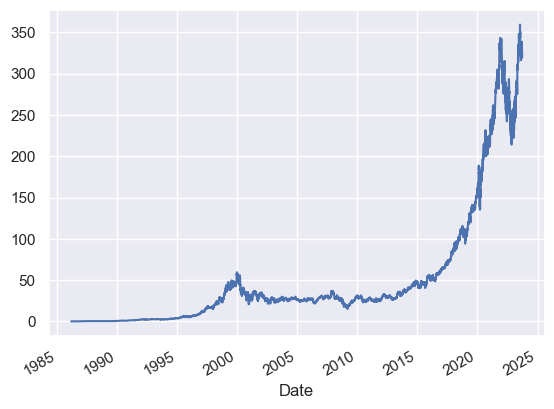

In [115]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

msft_close.plot();